### Decision Tree Theory

#### Training a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

#### Visualising the Decision Tree

In [7]:
from sklearn.tree import  export_graphviz
import graphviz
from IPython.display import Image

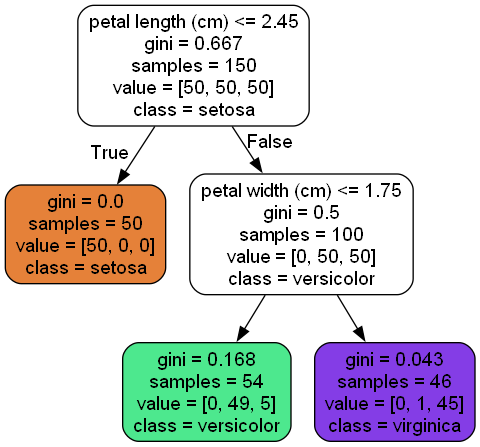

In [8]:
# Export the decision tree to a .dot file
dot_data = export_graphviz(tree_clf,
                           out_file=None,  # Do not write to a file
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True,
                           filled=True)

# Use graphviz to create an image from the .dot data
graph = graphviz.Source(dot_data)

# Display the image in the Jupyter notebook
graph.render("iris_tree")  # Save as iris_tree.pdf
graph.format = 'png'
graph.render("iris_tree")  # Save as iris_tree.png

# Display the image
Image(filename='iris_tree.png')

#### How does a Decision tree make predictions?
- In this example you are trying to classify an iris flower
- we start at the root node which is the top most box
- it asks whetherr the flowers petal width is less than 0.8cm
- if it is we move to the box on the left, since there is no mmore child nodes the the instance is classified as a setosa
- if false we move to the right and the same argument applies which can classify the nodes 
- a node has a samples attribute which telll us how manyy training instances have that specific criteria
- A node has a value attribute tells us how many training instances each class in this node applies to for examp-ple the bottom left node appplies to 0 setosa 49 versicolor and 5 virginica
- a nodes gini attribute measures its impurity, a node is pure if gini=0, ie if all trraining instances applied to belongs in the same class

#### Gini Impurity Formula
$$
Gini(p) = 1 - \sum_{i=1}^{k} p_i^2
$$
where $p_{i,k}$ is the ratio of class k instances in the training instances on the ith node

#### Estimating Class Probabilities 

A Decision tree can estimmaqte the probability an instance beklongs to a particular class k, it will ggo through the tree to find the leaf node for the instance and then it returrns the ratio ofd training instances of class k in the node 7
we can do this easilty using the predict functionm

In [10]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

clearly the decision tree predicts this to be a versicolor